In [57]:
import pandas as pd 
import numpy as np
import networkx as nx
import csv
from collections import defaultdict, deque
import sys
from matplotlib import pyplot as plt
import math

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split   
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import naive_bayes, metrics

In [77]:
f = open('../train.txt')
sources = defaultdict(int)
sinks = defaultdict(int)
follows = defaultdict(set)
followedby = defaultdict(set)
lines = 0

for line in f.readlines():
    splitted_line = line.split()
    src, dests = splitted_line[0], splitted_line[1:]
    src = int(src)
    dests = [int(x) for x in dests]
    
    sources[src] = len(dests)
    follows[src].update(dests)
    
    for dest in dests:
        sinks[dest] += 1
        followedby[dest].add(src)
    print(lines, len(dests), len(set(dests)))
    lines+=1
    
f.close()

0 143 143
1 21 21
2 764195 761793
3 297 297
4 3808 3808
5 4519 4518
6 333 333
7 227 227
8 258 258
9 1225 1225
10 87 87
11 8414 8414
12 314 314
13 1148 1148
14 0 0
15 1935 1935
16 11757 11757
17 369 369
18 6230 6230
19 226 226
20 366 366
21 1612 1612
22 101 101
23 698 698
24 113 113
25 10357 10356
26 1458 1458
27 7971 7971
28 389 389
29 1 1
30 25 25
31 133 133
32 107 107
33 226 226
34 222 222
35 120 120
36 227 227
37 21 21
38 58 58
39 21 21
40 430 430
41 148 148
42 5849 5849
43 363 363
44 197 197
45 226 226
46 52 52
47 206 206
48 89 89
49 138 138
50 33 33
51 1 1
52 0 0
53 113 113
54 1274 1274
55 57 57
56 14576 14574
57 124 124
58 58 58
59 67 67
60 357 357
61 97 97
62 213 213
63 185 185
64 737 737
65 78 78
66 1526 1526
67 175 175
68 73 73
69 122 122
70 131 131
71 316 316
72 2455 2455
73 220 220
74 26 26
75 117 117
76 21104 21104
77 88 88
78 1699 1699
79 197 197
80 902 902
81 40 40
82 2972 2972
83 188 188
84 25 25
85 56 56
86 92 92
87 55 55
88 47 47
89 118 118
90 1012 1012
91 7579 7579
92

738 53154 53149
739 315 315
740 48 48
741 121 121
742 14 14
743 12713 12712
744 801 801
745 142 142
746 18 18
747 385 385
748 299 299
749 729 729
750 10586 10586
751 205 205
752 2002 2002
753 159 159
754 271 271
755 193 193
756 164 164
757 218 218
758 12 12
759 325 325
760 533 533
761 525 525
762 234 234
763 32 32
764 219 219
765 387 387
766 933 933
767 1241 1241
768 193 193
769 1349 1349
770 3358 3358
771 99 99
772 248 248
773 519 519
774 584 584
775 98625 98622
776 1498 1498
777 68853 68849
778 491 491
779 23 23
780 130 130
781 18 18
782 1 1
783 75 75
784 181 181
785 567 567
786 206 206
787 1936 1936
788 88 88
789 43 43
790 106 106
791 256 256
792 171 171
793 866 866
794 922 922
795 38 38
796 98 98
797 78 78
798 1824 1824
799 731 731
800 105 105
801 16 16
802 789 789
803 217 217
804 199 199
805 154 154
806 298 298
807 0 0
808 687 687
809 10280 10280
810 301 301
811 827 827
812 3 3
813 5493 5493
814 23683 23683
815 329 329
816 323 323
817 111 111
818 5418 5417
819 11430 11430
820 248 

1449 5210 5210
1450 65 65
1451 596 596
1452 1030 1030
1453 76 76
1454 192 192
1455 118 118
1456 92 92
1457 95 95
1458 104 104
1459 249 249
1460 385 385
1461 172 172
1462 876 876
1463 50 50
1464 248 248
1465 31 31
1466 116 116
1467 254 254
1468 1430 1430
1469 169 169
1470 1527 1527
1471 60 60
1472 102 102
1473 244 244
1474 92 92
1475 40 40
1476 20607 20606
1477 120 120
1478 255 255
1479 113 113
1480 3 3
1481 59 59
1482 67 67
1483 183 183
1484 492 492
1485 93 93
1486 15678 15678
1487 512 512
1488 35111 35111
1489 273 273
1490 464 464
1491 301 301
1492 185 185
1493 46 46
1494 39 39
1495 85 85
1496 3 3
1497 113 113
1498 2642 2642
1499 53 53
1500 118 118
1501 1985 1985
1502 584 584
1503 349 349
1504 1461 1461
1505 2099 2099
1506 36 36
1507 379 379
1508 57 57
1509 153 153
1510 6949 6949
1511 514 514
1512 103 103
1513 269 269
1514 124 124
1515 153 153
1516 8421 8420
1517 47 47
1518 1763 1763
1519 6382 6381
1520 112 112
1521 920 920
1522 34 34
1523 893 893
1524 316 316
1525 27 27
1526 7 7
1527

2149 18490 18486
2150 52 52
2151 84 84
2152 9 9
2153 151 151
2154 70 70
2155 20 20
2156 30 30
2157 26 26
2158 95 95
2159 18 18
2160 39 39
2161 22 22
2162 65 65
2163 62 62
2164 3 3
2165 9 9
2166 115 115
2167 29 29
2168 127 127
2169 32 32
2170 6 6
2171 26 26
2172 34 34
2173 15 15
2174 2 2
2175 29 29
2176 51 51
2177 1630 1630
2178 18 18
2179 6 6
2180 50 50
2181 53 53
2182 105865 105859
2183 3 3
2184 35 35
2185 1 1
2186 102 102
2187 1526 1526
2188 3 3
2189 20 20
2190 73 73
2191 3 3
2192 122 122
2193 1335 1335
2194 3 3
2195 1075 1075
2196 12468 12468
2197 75 75
2198 503 503
2199 22 22
2200 85 85
2201 2 2
2202 66 66
2203 6 6
2204 153 153
2205 63 63
2206 119 119
2207 50 50
2208 383 383
2209 159 159
2210 1 1
2211 296 296
2212 140 140
2213 58 58
2214 140 140
2215 4180 4179
2216 864 864
2217 326 326
2218 18 18
2219 689 689
2220 216 216
2221 0 0
2222 17 17
2223 246 246
2224 11 11
2225 33 33
2226 5 5
2227 19 19
2228 51 51
2229 5 5
2230 30 30
2231 57 57
2232 34 34
2233 88 88
2234 52 52
2235 77 77
2

2937 128 128
2938 118 118
2939 875 875
2940 91 91
2941 215 215
2942 101514 101510
2943 71 71
2944 72 72
2945 199 199
2946 36 36
2947 89 89
2948 117 117
2949 2765 2765
2950 164 164
2951 14 14
2952 243 243
2953 3666 3666
2954 23 23
2955 265 265
2956 546 546
2957 48401 48400
2958 16 16
2959 20 20
2960 915 915
2961 58 58
2962 8 8
2963 5131 5131
2964 1905 1905
2965 34969 34965
2966 606 606
2967 202 202
2968 56 56
2969 9824 9822
2970 7 7
2971 135 135
2972 5655 5655
2973 957 957
2974 23 23
2975 113327 113322
2976 38 38
2977 18 18
2978 1076 1076
2979 0 0
2980 112 112
2981 52 52
2982 110 110
2983 76 76
2984 6 6
2985 96 96
2986 70 70
2987 375 375
2988 84 84
2989 458 458
2990 27 27
2991 235 235
2992 40 40
2993 51 51
2994 11 11
2995 38 38
2996 1 1
2997 659 659
2998 39 39
2999 27 27
3000 287 287
3001 343 343
3002 80 80
3003 206 206
3004 249 249
3005 341 341
3006 2748 2748
3007 9 9
3008 610 610
3009 561 561
3010 3453 3453
3011 247 247
3012 1909 1909
3013 5 5
3014 717 717
3015 1668 1668
3016 42 42
30

3617 66850 66845
3618 88 88
3619 25 25
3620 135 135
3621 490 490
3622 1104 1104
3623 34733 34731
3624 88 88
3625 94 94
3626 105 105
3627 194 194
3628 2012 2012
3629 46 46
3630 91 91
3631 492 492
3632 27 27
3633 38 38
3634 2 2
3635 906 906
3636 51 51
3637 997 997
3638 917 917
3639 393 393
3640 67 67
3641 17401 17400
3642 13 13
3643 57 57
3644 1994 1994
3645 117 117
3646 258 258
3647 121 121
3648 9542 9541
3649 34 34
3650 0 0
3651 997 997
3652 27 27
3653 212 212
3654 89464 89460
3655 91 91
3656 13 13
3657 60 60
3658 1693 1693
3659 55 55
3660 10 10
3661 129 129
3662 71 71
3663 805 805
3664 99 99
3665 263 263
3666 1025 1025
3667 107 107
3668 1343 1343
3669 201 201
3670 166 166
3671 149 149
3672 4195 4195
3673 18 18
3674 22 22
3675 70 70
3676 306 306
3677 387 387
3678 1546 1546
3679 6 6
3680 67 67
3681 5 5
3682 341 341
3683 57 57
3684 266 266
3685 10 10
3686 1473 1473
3687 28 28
3688 366 366
3689 211 211
3690 56 56
3691 80 80
3692 113 113
3693 2 2
3694 403 403
3695 17 17
3696 9 9
3697 138 1

4329 11111 11111
4330 240 240
4331 71 71
4332 122 122
4333 18 18
4334 312 312
4335 205 205
4336 419 419
4337 24 24
4338 249 249
4339 1955 1955
4340 101 101
4341 90 90
4342 18 18
4343 588 588
4344 63 63
4345 205 205
4346 331 331
4347 76 76
4348 19 19
4349 1215 1215
4350 12 12
4351 58 58
4352 100 100
4353 231 231
4354 1977 1977
4355 134 134
4356 12 12
4357 367 367
4358 92 92
4359 1261 1261
4360 3 3
4361 5046 5045
4362 311 311
4363 16 16
4364 146 146
4365 291 291
4366 34 34
4367 56 56
4368 776 776
4369 5 5
4370 23 23
4371 132 132
4372 2777 2777
4373 16546 16546
4374 1109 1109
4375 74 74
4376 5 5
4377 8285 8285
4378 917 917
4379 4 4
4380 3 3
4381 161 161
4382 143 143
4383 1996 1996
4384 55 55
4385 14 14
4386 1042 1042
4387 110 110
4388 138 138
4389 63 63
4390 27 27
4391 36 36
4392 89 89
4393 68 68
4394 1 1
4395 276 276
4396 135 135
4397 643 643
4398 90 90
4399 126 126
4400 303 303
4401 131 131
4402 375 375
4403 25 25
4404 0 0
4405 6621 6621
4406 117 117
4407 13 13
4408 10 10
4409 21 21
441

5076 20660 20659
5077 322 322
5078 5377 5377
5079 6 6
5080 47945 47943
5081 0 0
5082 154 154
5083 246 246
5084 2204 2204
5085 826 826
5086 4 4
5087 12 12
5088 115 115
5089 180 180
5090 11 11
5091 24 24
5092 68 68
5093 40 40
5094 298 298
5095 238 238
5096 60 60
5097 98 98
5098 206 206
5099 317 317
5100 44 44
5101 24 24
5102 135 135
5103 18 18
5104 83 83
5105 4 4
5106 129 129
5107 46539 46534
5108 68 68
5109 73 73
5110 137 137
5111 26 26
5112 46 46
5113 1847 1847
5114 1197 1197
5115 1163 1163
5116 191 191
5117 137 137
5118 39 39
5119 71 71
5120 136 136
5121 189 189
5122 41 41
5123 49 49
5124 945 945
5125 83 83
5126 498 498
5127 35 35
5128 35 35
5129 77 77
5130 1 1
5131 159 159
5132 113 113
5133 83 83
5134 9317 9317
5135 909 909
5136 301 301
5137 199 199
5138 223 223
5139 0 0
5140 1280 1280
5141 11 11
5142 21 21
5143 2 2
5144 243 243
5145 1670 1670
5146 33 33
5147 60 60
5148 50 50
5149 7801 7800
5150 79 79
5151 7 7
5152 2236 2236
5153 600 600
5154 1689 1689
5155 690 690
5156 732 732
5157 

5798 59416 59415
5799 23 23
5800 4916 4916
5801 185 185
5802 24 24
5803 60 60
5804 38 38
5805 237 237
5806 463 463
5807 204 204
5808 85 85
5809 1515 1515
5810 57 57
5811 110 110
5812 958 958
5813 28512 28510
5814 27 27
5815 93 93
5816 135 135
5817 97 97
5818 62 62
5819 657 657
5820 709 709
5821 125 125
5822 33 33
5823 116 116
5824 79 79
5825 219 219
5826 30 30
5827 3 3
5828 231 231
5829 47 47
5830 262 262
5831 139 139
5832 1232 1232
5833 2 2
5834 1783 1783
5835 69 69
5836 9 9
5837 139 139
5838 9 9
5839 103 103
5840 1626 1626
5841 17 17
5842 4945 4945
5843 49 49
5844 80 80
5845 12750 12750
5846 43 43
5847 93 93
5848 13 13
5849 394 394
5850 196 196
5851 20 20
5852 165 165
5853 107 107
5854 121 121
5855 56 56
5856 674 674
5857 1055 1055
5858 2 2
5859 2037 2037
5860 12 12
5861 0 0
5862 166 166
5863 142 142
5864 149 149
5865 96 96
5866 1262 1262
5867 124 124
5868 74 74
5869 16 16
5870 21 21
5871 41 41
5872 38 38
5873 400 400
5874 19 19
5875 29 29
5876 70 70
5877 3842 3842
5878 210 210
5879 

6656 28456 28455
6657 1860 1860
6658 136 136
6659 6 6
6660 16 16
6661 23 23
6662 52 52
6663 121 121
6664 73 73
6665 327 327
6666 12 12
6667 33 33
6668 811 811
6669 20 20
6670 507 507
6671 621 621
6672 318 318
6673 28 28
6674 8 8
6675 19 19
6676 62 62
6677 5 5
6678 168 168
6679 31 31
6680 64 64
6681 115 115
6682 59 59
6683 40 40
6684 64 64
6685 1983 1983
6686 69 69
6687 298 298
6688 149 149
6689 14 14
6690 46 46
6691 27 27
6692 26 26
6693 38 38
6694 38 38
6695 45 45
6696 6 6
6697 77 77
6698 102 102
6699 48 48
6700 141 141
6701 82 82
6702 173 173
6703 0 0
6704 52 52
6705 2411 2411
6706 121 121
6707 92 92
6708 24 24
6709 104 104
6710 1727 1727
6711 72 72
6712 125 125
6713 67 67
6714 262 262
6715 48 48
6716 1 1
6717 527 527
6718 60 60
6719 7 7
6720 1 1
6721 400 400
6722 167 167
6723 1057 1057
6724 118 118
6725 30 30
6726 41 41
6727 7 7
6728 1406 1406
6729 81 81
6730 29 29
6731 88 88
6732 89 89
6733 1049 1049
6734 19 19
6735 164 164
6736 3 3
6737 1935 1935
6738 80 80
6739 636 636
6740 102 1

7413 55 55
7414 43 43
7415 11 11
7416 6 6
7417 60 60
7418 45 45
7419 695 695
7420 16 16
7421 47 47
7422 32 32
7423 15 15
7424 42 42
7425 42 42
7426 164 164
7427 64 64
7428 5 5
7429 38 38
7430 28 28
7431 124 124
7432 16 16
7433 57 57
7434 0 0
7435 4 4
7436 24 24
7437 19 19
7438 599 599
7439 28 28
7440 6 6
7441 54 54
7442 150 150
7443 262 262
7444 44 44
7445 47 47
7446 17 17
7447 51 51
7448 24 24
7449 90 90
7450 55 55
7451 420 420
7452 35 35
7453 109 109
7454 82 82
7455 227 227
7456 7 7
7457 5 5
7458 77 77
7459 113 113
7460 233 233
7461 190 190
7462 300 300
7463 3 3
7464 12 12
7465 22 22
7466 121 121
7467 85 85
7468 25 25
7469 186 186
7470 23 23
7471 650 650
7472 54 54
7473 335 335
7474 85 85
7475 40 40
7476 57 57
7477 36 36
7478 2744 2744
7479 25 25
7480 81 81
7481 99 99
7482 681 681
7483 24 24
7484 6 6
7485 68 68
7486 162 162
7487 174 174
7488 18 18
7489 41 41
7490 62 62
7491 11 11
7492 17 17
7493 73 73
7494 141 141
7495 84 84
7496 8 8
7497 70 70
7498 40 40
7499 44 44
7500 58 58
7501 9

8331 19 19
8332 20 20
8333 40 40
8334 203 203
8335 14 14
8336 5 5
8337 72 72
8338 103 103
8339 14 14
8340 17 17
8341 68 68
8342 3 3
8343 91 91
8344 52 52
8345 249 249
8346 4363 4362
8347 5860 5860
8348 43 43
8349 62 62
8350 57 57
8351 11 11
8352 103 103
8353 24 24
8354 38 38
8355 65 65
8356 72 72
8357 12 12
8358 145 145
8359 202 202
8360 43 43
8361 1907 1907
8362 25 25
8363 35 35
8364 12 12
8365 199 199
8366 110 110
8367 849 849
8368 35 35
8369 0 0
8370 1195 1195
8371 28 28
8372 135 135
8373 18 18
8374 191 191
8375 273 273
8376 2 2
8377 62 62
8378 2 2
8379 6 6
8380 12 12
8381 19 19
8382 125 125
8383 31 31
8384 28 28
8385 450 450
8386 15 15
8387 570 570
8388 48 48
8389 157 157
8390 42 42
8391 2133 2133
8392 50 50
8393 23 23
8394 66 66
8395 0 0
8396 3189 3189
8397 1 1
8398 6 6
8399 9 9
8400 256 256
8401 60 60
8402 16 16
8403 645 645
8404 124 124
8405 234 234
8406 44 44
8407 10 10
8408 98 98
8409 28 28
8410 30 30
8411 6 6
8412 17 17
8413 43 43
8414 23 23
8415 45 45
8416 2492 2492
8417 17 

9062 895 895
9063 78 78
9064 504 504
9065 1267 1267
9066 318 318
9067 257 257
9068 32 32
9069 340 340
9070 149 149
9071 243 243
9072 206 206
9073 260 260
9074 2018 2018
9075 10933 10933
9076 815 815
9077 112 112
9078 1714 1714
9079 330 330
9080 539 539
9081 1967 1967
9082 99 99
9083 2471 2471
9084 332 332
9085 743 743
9086 45 45
9087 9 9
9088 281 281
9089 398 398
9090 393 393
9091 251 251
9092 43 43
9093 267 267
9094 416 416
9095 1908 1908
9096 213 213
9097 1344 1344
9098 55 55
9099 309 309
9100 2590 2590
9101 1369 1369
9102 299 299
9103 142 142
9104 1411 1411
9105 276 276
9106 102 102
9107 496 496
9108 1370 1370
9109 136 136
9110 119 119
9111 99 99
9112 6619 6619
9113 62 62
9114 682 682
9115 479 479
9116 60 60
9117 533 533
9118 380 380
9119 2301 2301
9120 359 359
9121 874 874
9122 3646 3646
9123 208 208
9124 1901 1901
9125 255 255
9126 401 401
9127 421 421
9128 355 355
9129 489 489
9130 326 326
9131 255 255
9132 96 96
9133 139 139
9134 140 140
9135 1054 1054
9136 80 80
9137 1118 1118


9935 0 0
9936 208 208
9937 147 147
9938 265 265
9939 6 6
9940 65 65
9941 1238 1238
9942 648 648
9943 219 219
9944 200 200
9945 217 217
9946 272 272
9947 4 4
9948 15 15
9949 75 75
9950 91 91
9951 403 403
9952 371 371
9953 636 636
9954 159 159
9955 179 179
9956 661 661
9957 258 258
9958 347 347
9959 1862 1862
9960 6 6
9961 829 829
9962 283 283
9963 251 251
9964 250 250
9965 1369 1369
9966 225 225
9967 59 59
9968 247 247
9969 126 126
9970 0 0
9971 1769 1769
9972 305 305
9973 454 454
9974 559 559
9975 502 502
9976 967 967
9977 608 608
9978 473 473
9979 1527 1527
9980 1086 1086
9981 98 98
9982 351 351
9983 9 9
9984 118 118
9985 427 427
9986 827 827
9987 37 37
9988 156 156
9989 247 247
9990 1522 1522
9991 469 469
9992 183 183
9993 319 319
9994 113 113
9995 236 236
9996 693 693
9997 135 135
9998 1456 1456
9999 248 248
10000 122 122
10001 244 244
10002 156 156
10003 559 559
10004 101 101
10005 194 194
10006 152 152
10007 349 349
10008 1027 1027
10009 214 214
10010 266 266
10011 192 192
10012 5

10627 148 148
10628 415 415
10629 0 0
10630 136 136
10631 559 559
10632 397 397
10633 3465 3465
10634 257 257
10635 75 75
10636 284 284
10637 141 141
10638 24 24
10639 9 9
10640 65 65
10641 16 16
10642 313 313
10643 98 98
10644 386 386
10645 139 139
10646 251 251
10647 547 547
10648 2 2
10649 3983 3983
10650 745 745
10651 224 224
10652 63 63
10653 190 190
10654 453 453
10655 3887 3887
10656 460 460
10657 80 80
10658 179 179
10659 271 271
10660 83 83
10661 154 154
10662 13 13
10663 103 103
10664 67 67
10665 78 78
10666 99 99
10667 174 174
10668 142 142
10669 87 87
10670 222 222
10671 655 655
10672 254 254
10673 64 64
10674 20 20
10675 100 100
10676 1108 1108
10677 968 968
10678 235 235
10679 108 108
10680 90 90
10681 674 674
10682 125 125
10683 943 943
10684 610 610
10685 92 92
10686 34 34
10687 226 226
10688 349 349
10689 112 112
10690 88 88
10691 376 376
10692 268 268
10693 664 664
10694 1053 1053
10695 1418 1418
10696 850 850
10697 23 23
10698 152 152
10699 106 106
10700 261 261
1070

11318 7750 7750
11319 187 187
11320 1811 1811
11321 384 384
11322 31 31
11323 39 39
11324 179 179
11325 885 885
11326 301 301
11327 380 380
11328 926 926
11329 244 244
11330 68 68
11331 108 108
11332 81 81
11333 255 255
11334 998 998
11335 104 104
11336 87 87
11337 515 515
11338 195 195
11339 149 149
11340 148 148
11341 454 454
11342 36 36
11343 1258 1258
11344 600 600
11345 205 205
11346 101 101
11347 902 902
11348 93 93
11349 230 230
11350 207 207
11351 167 167
11352 2442 2442
11353 1 1
11354 203 203
11355 0 0
11356 198 198
11357 376 376
11358 195 195
11359 272 272
11360 937 937
11361 262 262
11362 259 259
11363 192 192
11364 32 32
11365 715 715
11366 115 115
11367 139 139
11368 220 220
11369 159 159
11370 167 167
11371 75 75
11372 263 263
11373 545 545
11374 138 138
11375 14 14
11376 261 261
11377 199 199
11378 429 429
11379 135 135
11380 654 654
11381 491 491
11382 190 190
11383 186 186
11384 481 481
11385 4 4
11386 313 313
11387 89 89
11388 8 8
11389 326 326
11390 352 352
11391 84

11920 10990 10990
11921 717 717
11922 268 268
11923 159 159
11924 654 654
11925 805 805
11926 278 278
11927 129 129
11928 146 146
11929 644 644
11930 2831 2831
11931 170 170
11932 126 126
11933 284 284
11934 24 24
11935 972 972
11936 133 133
11937 0 0
11938 338 338
11939 1696 1696
11940 94 94
11941 202 202
11942 172 172
11943 1863 1863
11944 630 630
11945 1887 1887
11946 1883 1883
11947 61 61
11948 6897 6896
11949 85 85
11950 129 129
11951 399 399
11952 9 9
11953 229 229
11954 576 576
11955 47 47
11956 264 264
11957 399 399
11958 256 256
11959 454 454
11960 349 349
11961 254 254
11962 8 8
11963 229 229
11964 72 72
11965 11 11
11966 64 64
11967 7 7
11968 7 7
11969 1523 1523
11970 420 420
11971 0 0
11972 262 262
11973 301 301
11974 307 307
11975 63 63
11976 224 224
11977 908 908
11978 552 552
11979 1079 1079
11980 236 236
11981 100 100
11982 858 858
11983 221 221
11984 20 20
11985 187 187
11986 42 42
11987 51 51
11988 2688 2688
11989 172 172
11990 367 367
11991 530 530
11992 584 584
1199

12621 134 134
12622 372 372
12623 202 202
12624 107 107
12625 94 94
12626 26 26
12627 17 17
12628 71 71
12629 17 17
12630 484 484
12631 1461 1461
12632 12 12
12633 11 11
12634 90 90
12635 732 732
12636 184 184
12637 280 280
12638 751 751
12639 4277 4277
12640 1488 1488
12641 927 927
12642 1911 1911
12643 862 862
12644 735 735
12645 184 184
12646 304 304
12647 413 413
12648 335 335
12649 380 380
12650 721 721
12651 456 456
12652 3 3
12653 564 564
12654 15 15
12655 536 536
12656 3938 3938
12657 1 1
12658 325 325
12659 39 39
12660 95 95
12661 121 121
12662 72 72
12663 894 894
12664 4821 4820
12665 209 209
12666 126 126
12667 107 107
12668 145 145
12669 917 917
12670 45 45
12671 5749 5749
12672 369 369
12673 675 675
12674 23 23
12675 158 158
12676 15 15
12677 458 458
12678 41 41
12679 1304 1304
12680 175 175
12681 375 375
12682 200 200
12683 542 542
12684 30 30
12685 427 427
12686 387 387
12687 286 286
12688 817 817
12689 217 217
12690 54 54
12691 72 72
12692 292 292
12693 395 395
12694 56

13273 12172 12172
13274 1909 1909
13275 952 952
13276 363 363
13277 536 536
13278 541 541
13279 15 15
13280 14747 14747
13281 302 302
13282 103 103
13283 2112 2112
13284 285 285
13285 86 86
13286 388 388
13287 3 3
13288 236 236
13289 68 68
13290 664 664
13291 177 177
13292 931 931
13293 29 29
13294 376 376
13295 1 1
13296 190 190
13297 150 150
13298 66 66
13299 117 117
13300 374 374
13301 144 144
13302 64 64
13303 1041 1041
13304 134 134
13305 2000 2000
13306 61 61
13307 156 156
13308 125 125
13309 364 364
13310 295 295
13311 99 99
13312 326 326
13313 324 324
13314 593 593
13315 80 80
13316 1608 1608
13317 595 595
13318 1054 1054
13319 344 344
13320 154 154
13321 4228 4228
13322 177 177
13323 386 386
13324 34 34
13325 201 201
13326 358 358
13327 354 354
13328 300 300
13329 1694 1694
13330 1390 1390
13331 0 0
13332 0 0
13333 388 388
13334 202 202
13335 449 449
13336 0 0
13337 150 150
13338 126 126
13339 1820 1820
13340 1921 1921
13341 0 0
13342 1999 1999
13343 453 453
13344 101 101
1334

13977 66490 66486
13978 172 172
13979 3104 3104
13980 853 853
13981 51 51
13982 1240 1240
13983 455 455
13984 299 299
13985 1952 1952
13986 157 157
13987 63 63
13988 935 935
13989 124 124
13990 57 57
13991 246 246
13992 810 810
13993 1 1
13994 1038 1038
13995 163 163
13996 112 112
13997 965 965
13998 241 241
13999 267 267
14000 529 529
14001 51 51
14002 24 24
14003 723 723
14004 4607 4607
14005 114 114
14006 3171 3171
14007 28 28
14008 999 999
14009 1628 1628
14010 37 37
14011 142 142
14012 385 385
14013 964 964
14014 309 309
14015 7 7
14016 824 824
14017 286 286
14018 71 71
14019 124 124
14020 488 488
14021 270 270
14022 65 65
14023 18 18
14024 138 138
14025 342 342
14026 164 164
14027 435 435
14028 175 175
14029 161 161
14030 9020 9019
14031 24 24
14032 429 429
14033 157 157
14034 169 169
14035 239 239
14036 137 137
14037 166 166
14038 165 165
14039 58 58
14040 1 1
14041 771 771
14042 564 564
14043 199 199
14044 90 90
14045 65 65
14046 227 227
14047 335 335
14048 107 107
14049 241 24

14760 58 58
14761 495 495
14762 1296 1296
14763 524 524
14764 155 155
14765 470 470
14766 136 136
14767 20786 20786
14768 3 3
14769 5964 5964
14770 82 82
14771 240 240
14772 88 88
14773 0 0
14774 261 261
14775 153 153
14776 114 114
14777 688 688
14778 10 10
14779 28 28
14780 784 784
14781 1000 1000
14782 18480 18480
14783 452 452
14784 332 332
14785 158 158
14786 179 179
14787 463 463
14788 54 54
14789 4175 4175
14790 54 54
14791 2761 2761
14792 2337 2337
14793 590 590
14794 1 1
14795 580 580
14796 759 759
14797 45 45
14798 22 22
14799 3831 3831
14800 348 348
14801 50 50
14802 361 361
14803 213 213
14804 8153 8153
14805 815 815
14806 283 283
14807 392 392
14808 303 303
14809 158 158
14810 760 760
14811 14 14
14812 0 0
14813 279 279
14814 641 641
14815 0 0
14816 44 44
14817 111 111
14818 631 631
14819 0 0
14820 273 273
14821 0 0
14822 0 0
14823 2404 2404
14824 125 125
14825 119 119
14826 1030 1030
14827 65 65
14828 139 139
14829 139 139
14830 273 273
14831 51 51
14832 209 209
14833 75 7

15522 23531 23530
15523 630 630
15524 101 101
15525 599 599
15526 321 321
15527 41 41
15528 1179 1179
15529 180 180
15530 72 72
15531 169 169
15532 1058 1058
15533 45 45
15534 159 159
15535 217 217
15536 43 43
15537 654 654
15538 159 159
15539 205 205
15540 622 622
15541 159 159
15542 0 0
15543 68 68
15544 0 0
15545 12 12
15546 27 27
15547 852 852
15548 107 107
15549 517 517
15550 238 238
15551 955 955
15552 140 140
15553 345 345
15554 2931 2931
15555 1 1
15556 386 386
15557 754 754
15558 107 107
15559 65 65
15560 274 274
15561 222 222
15562 80 80
15563 156 156
15564 5501 5501
15565 435 435
15566 109 109
15567 54 54
15568 360 360
15569 359 359
15570 346 346
15571 560 560
15572 147 147
15573 125 125
15574 524 524
15575 1282 1282
15576 23 23
15577 3 3
15578 106 106
15579 154 154
15580 155 155
15581 280 280
15582 3462 3462
15583 1223 1223
15584 697 697
15585 2596 2596
15586 187 187
15587 1696 1696
15588 249 249
15589 269 269
15590 7 7
15591 43 43
15592 161 161
15593 201 201
15594 136 136


16282 6305 6305
16283 271 271
16284 981 981
16285 9 9
16286 3 3
16287 5 5
16288 564 564
16289 130 130
16290 290 290
16291 0 0
16292 552 552
16293 126 126
16294 49 49
16295 100 100
16296 817 817
16297 28 28
16298 196 196
16299 3132 3132
16300 369 369
16301 92 92
16302 136 136
16303 196 196
16304 1171 1171
16305 267 267
16306 517 517
16307 68 68
16308 94 94
16309 26 26
16310 4 4
16311 159 159
16312 47 47
16313 52 52
16314 33 33
16315 147 147
16316 68 68
16317 98 98
16318 21 21
16319 218 218
16320 318 318
16321 16 16
16322 855 855
16323 19 19
16324 170 170
16325 792 792
16326 160 160
16327 6404 6404
16328 1052 1052
16329 828 828
16330 409 409
16331 808 808
16332 16 16
16333 52 52
16334 0 0
16335 274 274
16336 94 94
16337 730 730
16338 208 208
16339 1593 1593
16340 32 32
16341 4178 4178
16342 291 291
16343 99 99
16344 285 285
16345 71 71
16346 0 0
16347 88 88
16348 126 126
16349 3 3
16350 449 449
16351 103 103
16352 65 65
16353 666 666
16354 9552 9552
16355 27 27
16356 386 386
16357 4550 4

16968 35429 35428
16969 1348 1348
16970 55 55
16971 48 48
16972 317 317
16973 2964 2964
16974 163 163
16975 3 3
16976 104 104
16977 2466 2466
16978 1 1
16979 34 34
16980 275 275
16981 171 171
16982 353 353
16983 836 836
16984 642 642
16985 53 53
16986 114 114
16987 75 75
16988 143 143
16989 210 210
16990 96 96
16991 374 374
16992 348 348
16993 560 560
16994 42 42
16995 243 243
16996 394 394
16997 178 178
16998 309 309
16999 161 161
17000 292 292
17001 122 122
17002 385 385
17003 691 691
17004 79 79
17005 69 69
17006 55 55
17007 105 105
17008 193 193
17009 1 1
17010 240 240
17011 105 105
17012 5946 5946
17013 0 0
17014 867 867
17015 66 66
17016 492 492
17017 101 101
17018 125 125
17019 83 83
17020 105 105
17021 1918 1918
17022 276 276
17023 1817 1817
17024 279 279
17025 199 199
17026 0 0
17027 33 33
17028 1399 1399
17029 3660 3660
17030 72 72
17031 112 112
17032 352 352
17033 22636 22633
17034 56 56
17035 64 64
17036 1378 1378
17037 243 243
17038 166 166
17039 991 991
17040 106 106
1704

17689 4546 4545
17690 603 603
17691 4201 4200
17692 1897 1897
17693 109 109
17694 1946 1946
17695 144 144
17696 1919 1919
17697 268 268
17698 249 249
17699 229 229
17700 547 547
17701 277 277
17702 350 350
17703 162 162
17704 298 298
17705 138 138
17706 283 283
17707 33 33
17708 785 785
17709 272 272
17710 475 475
17711 102 102
17712 1443 1443
17713 1685 1685
17714 17216 17214
17715 136 136
17716 7803 7803
17717 880 880
17718 1199 1199
17719 400 400
17720 104 104
17721 472 472
17722 2 2
17723 0 0
17724 112 112
17725 220 220
17726 0 0
17727 30 30
17728 90 90
17729 43 43
17730 665 665
17731 1957 1957
17732 1459 1459
17733 380 380
17734 407 407
17735 93 93
17736 46 46
17737 60 60
17738 122 122
17739 121 121
17740 200 200
17741 36 36
17742 16 16
17743 148 148
17744 404 404
17745 71 71
17746 673 673
17747 50 50
17748 0 0
17749 0 0
17750 193 193
17751 133 133
17752 309 309
17753 99 99
17754 75 75
17755 198 198
17756 55 55
17757 0 0
17758 85 85
17759 441 441
17760 36 36
17761 290 290
17762 78

18300 61163 61161
18301 223 223
18302 317 317
18303 3083 3083
18304 33398 33396
18305 240 240
18306 83 83
18307 49 49
18308 90 90
18309 32 32
18310 246 246
18311 34 34
18312 41 41
18313 35 35
18314 682 682
18315 792 792
18316 46 46
18317 239 239
18318 33 33
18319 37 37
18320 51 51
18321 7 7
18322 235 235
18323 126 126
18324 530 530
18325 7 7
18326 0 0
18327 1086 1086
18328 386 386
18329 10 10
18330 148 148
18331 284 284
18332 0 0
18333 1 1
18334 181 181
18335 584 584
18336 132 132
18337 133 133
18338 187 187
18339 78 78
18340 156 156
18341 212 212
18342 45 45
18343 89 89
18344 120 120
18345 555 555
18346 9 9
18347 184 184
18348 52 52
18349 911 911
18350 1081 1081
18351 142 142
18352 25 25
18353 48 48
18354 82 82
18355 81 81
18356 224 224
18357 926 926
18358 898 898
18359 89 89
18360 154 154
18361 187 187
18362 66 66
18363 102 102
18364 243 243
18365 262 262
18366 31 31
18367 361 361
18368 279 279
18369 196 196
18370 98554 98552
18371 286 286
18372 430 430
18373 116 116
18374 109 109
18

19053 8029 8028
19054 480 480
19055 2091 2091
19056 193 193
19057 921 921
19058 53 53
19059 1 1
19060 417 417
19061 65 65
19062 49 49
19063 292 292
19064 25 25
19065 340 340
19066 2 2
19067 0 0
19068 233 233
19069 120 120
19070 443 443
19071 85 85
19072 59 59
19073 757 757
19074 2297 2297
19075 63 63
19076 113 113
19077 193 193
19078 9 9
19079 130 130
19080 0 0
19081 365 365
19082 206 206
19083 10 10
19084 1286 1286
19085 483 483
19086 187 187
19087 137 137
19088 1262 1262
19089 17344 17343
19090 15 15
19091 347 347
19092 174 174
19093 249 249
19094 2000 2000
19095 72 72
19096 146 146
19097 0 0
19098 1075 1075
19099 97 97
19100 1 1
19101 2420 2420
19102 150 150
19103 23 23
19104 104 104
19105 112 112
19106 691 691
19107 124 124
19108 0 0
19109 64 64
19110 390 390
19111 229 229
19112 86 86
19113 62 62
19114 319 319
19115 127 127
19116 3581 3581
19117 675 675
19118 11 11
19119 337 337
19120 571 571
19121 192 192
19122 1 1
19123 44 44
19124 1462 1462
19125 35 35
19126 131 131
19127 2235 2

19841 314 314
19842 651 651
19843 105 105
19844 1306 1306
19845 14 14
19846 126 126
19847 2145 2145
19848 83 83
19849 462 462
19850 19 19
19851 1680 1680
19852 107 107
19853 590 590
19854 268 268
19855 46 46
19856 0 0
19857 223 223
19858 36 36
19859 166 166
19860 0 0
19861 51 51
19862 67 67
19863 54 54
19864 110 110
19865 64 64
19866 64 64
19867 138 138
19868 122 122
19869 16 16
19870 1105 1105
19871 1348 1348
19872 193 193
19873 534 534
19874 57 57
19875 102 102
19876 1931 1931
19877 338 338
19878 59 59
19879 2081 2081
19880 13 13
19881 13 13
19882 112 112
19883 142 142
19884 247 247
19885 932 932
19886 89 89
19887 5309 5309
19888 31 31
19889 3577 3577
19890 861 861
19891 651 651
19892 72 72
19893 76 76
19894 747 747
19895 30 30
19896 74 74
19897 72 72
19898 153 153
19899 247 247
19900 115 115
19901 1242 1242
19902 265 265
19903 11 11
19904 65 65
19905 61 61
19906 41 41
19907 1071 1071
19908 1962 1962
19909 2 2
19910 1214 1214
19911 23 23
19912 277 277
19913 318 318
19914 22242 22242


In [78]:
print('dict(int) sizes in Mb: ', sys.getsizeof(sources) / 10**6, sys.getsizeof(sinks) / 10**6)
print('dict(set) sizes in Mb: ', sys.getsizeof(follows) / 10**6, sys.getsizeof(followedby) / 10**6)
print('number of sources and sinks: ', len(sources), len(sinks))

dict(int) sizes in Mb:  0.589936 167.772272
dict(set) sizes in Mb:  0.589936 167.772272
number of sources and sinks:  20000 4867136


## 1. select n super sources and m sinks

super sources with >= 6744 links


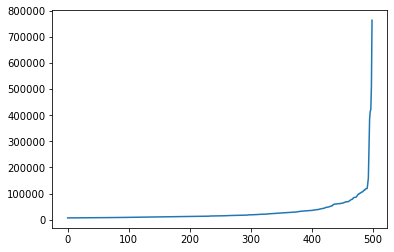

In [79]:
n = 500
m = 500

# super sources (follows many perple)
plt.plot(sorted(list(sources.values()))[20000-n:])
print('super sources with >=', sorted(list(sources.values()))[20000-n], 'links')

super sinks with >= 714 links


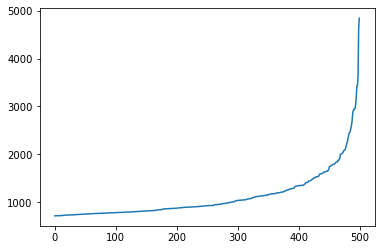

In [80]:
# super sinks (followed by many people)
plt.plot(sorted(list(sinks.values()))[4867136-m:])
print('super sinks with >=', sorted(list(sinks.values()))[4867136-m], 'links')

In [81]:
super_sources = list(map(lambda x: int(x[0]) ,sorted(sources.items(), key=lambda item: item[1], reverse = True)[:n])) 
super_sinks = list(map(lambda x: int(x[0]) ,sorted(sinks.items(), key=lambda item: item[1], reverse = True)[:m])) 

In [82]:
print(sorted(sources.items(), key=lambda item: item[1], reverse = True)[:n])
761793

[(3361377, 764195), (3509903, 511816), (3280389, 422106), (1580988, 414420), (3638272, 383713), (2827436, 280325), (427805, 160559), (3438576, 137761), (805360, 119314), (2981537, 118721), (2887240, 118413), (4011264, 116782), (1927211, 113327), (932720, 113272), (4360960, 110088), (3765475, 107917), (1534362, 105865), (354904, 105794), (4272102, 104175), (2961801, 101966), (765601, 101514), (2260014, 98625), (2851109, 98554), (4191410, 96437), (2405789, 93391), (4209323, 89464), (2343253, 86403), (1250021, 85916), (2075015, 85785), (2950311, 85122), (4727207, 84587), (3065808, 82322), (2147720, 78791), (2516076, 77787), (3137585, 77360), (1234540, 75258), (3449530, 73650), (1880135, 71927), (3676295, 70884), (3294702, 68892), (6618, 68853), (3561502, 68801), (1436216, 68772), (4417253, 68393), (1652056, 66850), (3235479, 66490), (471706, 65616), (3764177, 64567), (1063358, 63496), (1539837, 62984), (530200, 62813), (593740, 62807), (439557, 61749), (837553, 61665), (1875, 61390), (311

## 2. build groups from super nodes

In [104]:
groups = [set() for i in range(m+n)]

In [105]:
len(follows[3361377])

761793

In [106]:
def depthLimitedSearch(adjlist, visited, depth, limit, source, supernodes):
    visited.add(source)
    if depth < limit:
        #if len(adjlist[source]) > 0:
        #    print(depth, len(adjlist[source]))
        for follow in adjlist[source]:
            if follow not in supernodes:
                depthLimitedSearch(adjlist, visited, depth+1, limit, follow, supernodes)
    return

In [107]:
# run bfs from all super nodes, depth limited set to 2
limit = 2
group_id = 0
total = 0
for source in super_sources:
    depthLimitedSearch(follows, groups[group_id], 0, limit, source, set(super_sources))
    print(group_id, len(groups[group_id]))
    total += len(groups[group_id])
    group_id += 1

print(total)

0 1551623
1 1042358
2 656002
3 1126463
4 827474
5 593329
6 549079
7 987348
8 802106
9 457804
10 518121
11 703510
12 845700
13 782223
14 793701
15 441276
16 728355
17 937995
18 716591
19 775712
20 704114
21 798726
22 434129
23 795027
24 588421
25 771919
26 512345
27 910318
28 828557
29 562007
30 390342
31 665370
32 760046
33 725008
34 664047
35 585470
36 470998
37 555917
38 97617
39 579346
40 565110
41 611296
42 442879
43 605573
44 202341
45 548305
46 432854
47 562433
48 664917
49 565673
50 510571
51 592319
52 700428
53 689682
54 462208
55 556301
56 501265
57 718823
58 585650
59 893122
60 558209
61 539550
62 472779
63 584047
64 507618
65 453624
66 161720
67 524366
68 564654
69 456683
70 132631
71 470438
72 625257
73 377022
74 302555
75 252700
76 208102
77 429972
78 358020
79 398890
80 465662
81 721749
82 441417
83 487085
84 288122
85 312276
86 451957
87 372263
88 451284
89 323635
90 519286
91 421244
92 280659
93 422646
94 311348
95 279185
96 416061
97 372630
98 350321
99 548571
100 2870

## 3. generate features for edges

## 4. combine features

## 5. Train and test models

In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    return predictions

In [ ]:
def valid_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [ ]:
# Naive Bayes on Count Vectors
from sklearn.naive_bayes import MultinomialNB 
#ComplementNB

pred_data = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xtest_count)
accuracy = valid_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print ("MNB, Count Vectors: ", accuracy)
print(pred_data)

In [ ]:
result = pd.DataFrame()
result['Id'] = test_raw['ID']
result['Predicted'] = pred_data
result.to_csv('MultinomialNB.csv', sep=',', index=False)

## 6. submit prediction